#### IBM PROJECT - ANALYSING HISTORICAL STOCK/REVENUE DATA AND BUILDING A DASHBOARD

Hemant Thapa

#### LIBRARIES

In [221]:
import yfinance as yf
import fundamentalanalysis as fa
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib import ticker

### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [114]:
tesla = yf.Ticker('TSLA')

In [115]:
tesla_data = tesla.history(period="max")

In [116]:
tesla_data.reset_index(inplace=True)

In [117]:
tesla_data.shape

(3203, 8)

In [118]:
tesla_data.tail(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3201,2023-03-17 00:00:00-04:00,184.520004,186.220001,177.330002,180.130005,132936600,0.0,0.0
3202,2023-03-20 00:00:00-04:00,178.080002,186.440002,176.350006,183.250000,129507600,0.0,0.0


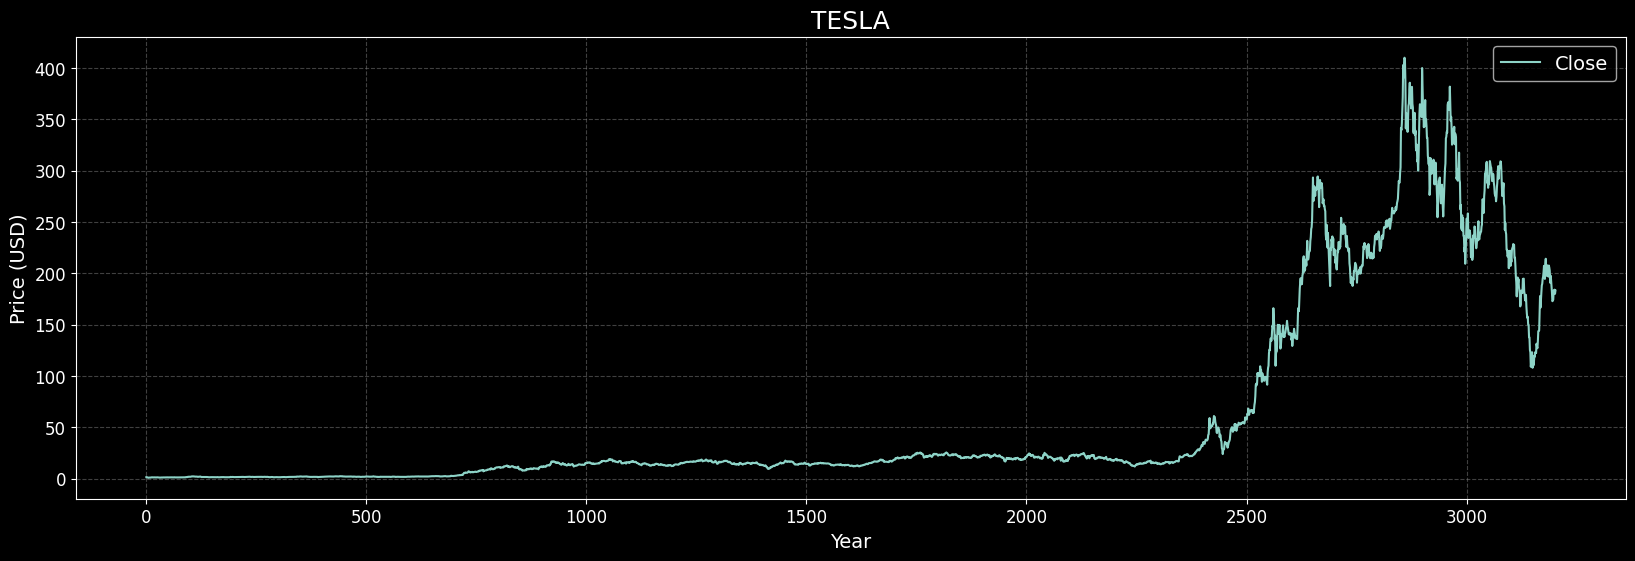

In [119]:
plt.style.use('dark_background')
plt.figure(figsize=(20,6))
tesla_data.Close.plot()
plt.title("TESLA", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price (USD)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [120]:
# Specify the URL of the webpage containing Tesla's revenue data
url = 'https://www.marketwatch.com/investing/stock/tsla/financials'
# Set the headers to simulate a web browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)
# Parse the HTML content of the webpage using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
# Find the table element that contains the revenue data
table = soup.find('table', {'class': 'table table--overflow align--right'})
# Extract the header row of the table
header_row = [th.text.strip() for th in table.find_all('th')[1:]]
# Extract the quarterly revenue data from the table
revenue_data = []
for row in table.find_all('tr')[1:]:
    quarter_data = {}
    cells = row.find_all('td')
    quarter_data['Quarter end date'] = cells[0].text.strip()
    for i, cell in enumerate(cells[1:]):
        if i == 0:
            quarter_data['Total revenue'] = cell.text.strip()
        elif i == 2:
            quarter_data['Net income'] = cell.text.strip()
        elif i == 3:
            quarter_data['Profit margin'] = cell.text.strip()
        else:
            quarter_data[header_row[i-3]] = cell.text.strip()
    revenue_data.append(quarter_data)

In [121]:
# Print the quarterly revenue data
for quarter in revenue_data:
    print('Quarter end date:', quarter['Quarter end date'])
    print('Revenue:', quarter['Total revenue'])
    print('Net income:', quarter['Net income'])
    print('Profit margin:', quarter['Profit margin'])
    print('----------------------------')

Quarter end date: Sales/Revenue
Sales/Revenue
Revenue: 21.46B
Net income: 31.54B
Profit margin: 53.82B
----------------------------
Quarter end date: Sales Growth
Sales Growth
Revenue: -
Net income: 28.31%
Profit margin: 70.67%
----------------------------
Quarter end date: Cost of Goods Sold (COGS) incl. D&A
Cost of Goods Sold (COGS) incl. D&A
Revenue: 17.42B
Net income: 24.91B
Profit margin: 40.22B
----------------------------
Quarter end date: COGS Growth
COGS Growth
Revenue: -
Net income: 21.44%
Profit margin: 61.48%
----------------------------
Quarter end date: COGS excluding D&A
COGS excluding D&A
Revenue: 15.52B
Net income: 22.58B
Profit margin: 37.31B
----------------------------
Quarter end date: Depreciation & Amortization Expense
Depreciation & Amortization Expense
Revenue: 1.9B
Net income: 2.32B
Profit margin: 2.91B
----------------------------
Quarter end date: Depreciation
Depreciation
Revenue: -
Net income: -
Profit margin: 1.91B
----------------------------
Quarter end

### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [122]:
game_stop = yf.Ticker('GME').history(period="max")

In [123]:
game_stop.reset_index(inplace=True)

In [124]:
game_stop.shape

(5311, 8)

In [125]:
game_stop.tail(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5309,2023-03-17 00:00:00-04:00,16.620001,16.719999,15.92,16.600000,5092100,0.0,0.0
5310,2023-03-20 00:00:00-04:00,16.650000,17.270000,16.25,16.870001,4455400,0.0,0.0


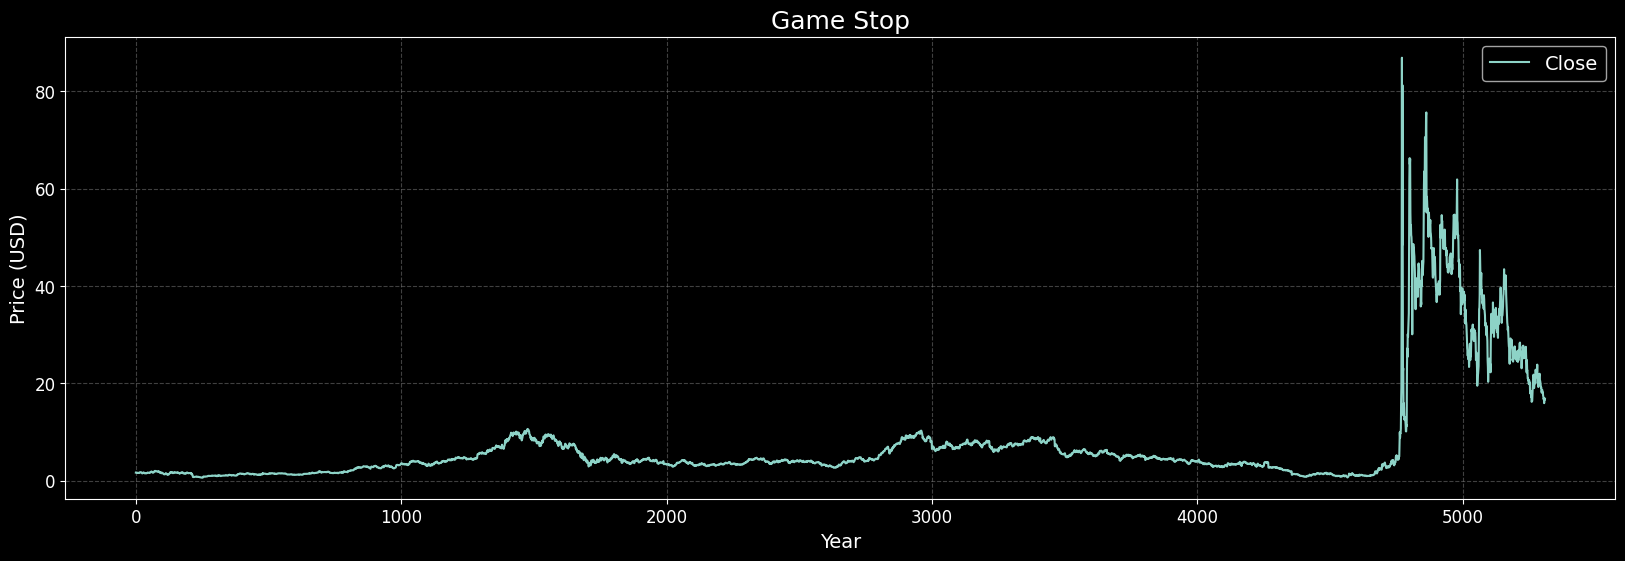

In [126]:
plt.style.use('dark_background')
plt.figure(figsize=(20,6))
game_stop.Close.plot()
plt.title("Game Stop", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price (USD)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [127]:
# Specify the URL of the webpage containing GameStop's revenue data
url = 'https://www.marketwatch.com/investing/stock/gme/financials'
# Set the headers to simulate a web browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)
# Parse the HTML content of the webpage using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
# Find the table element that contains the revenue data
table = soup.find('table', {'class': 'table table--overflow align--right'})
# Extract the header row of the table
header_row = [th.text.strip() for th in table.find_all('th')[1:]]
# Extract the quarterly revenue data from the table
revenue_data = []
for row in table.find_all('tr')[1:]:
    quarter_data = {}
    cells = row.find_all('td')
    quarter_data['Quarter end date'] = cells[0].text.strip()
    for i, cell in enumerate(cells[1:]):
        if i == 0:
            quarter_data['Total revenue'] = cell.text.strip()
        elif i == 2:
            quarter_data['Net income'] = cell.text.strip()
        elif i == 3:
            quarter_data['Profit margin'] = cell.text.strip()
        else:
            quarter_data[header_row[i-3]] = cell.text.strip()
    revenue_data.append(quarter_data)

In [128]:
# Print the quarterly revenue data
for quarter in revenue_data:
    print('Quarter end date:', quarter['Quarter end date'])
    print('Revenue:', quarter['Total revenue'])
    print('Net income:', quarter['Net income'])
    print('Profit margin:', quarter['Profit margin'])
    print('----------------------------')

Quarter end date: Sales/Revenue
Sales/Revenue
Revenue: 8.55B
Net income: 6.47B
Profit margin: 5.09B
----------------------------
Quarter end date: Sales Growth
Sales Growth
Revenue: -
Net income: -21.96%
Profit margin: -21.28%
----------------------------
Quarter end date: Cost of Goods Sold (COGS) incl. D&A
Cost of Goods Sold (COGS) incl. D&A
Revenue: 6.18B
Net income: 4.56B
Profit margin: 3.83B
----------------------------
Quarter end date: COGS Growth
COGS Growth
Revenue: -
Net income: -25.08%
Profit margin: -15.95%
----------------------------
Quarter end date: COGS excluding D&A
COGS excluding D&A
Revenue: 6.06B
Net income: 4.46B
Profit margin: 3.75B
----------------------------
Quarter end date: Depreciation & Amortization Expense
Depreciation & Amortization Expense
Revenue: 123.5M
Net income: 96.2M
Profit margin: 80.8M
----------------------------
Quarter end date: Depreciation
Depreciation
Revenue: 110.1M
Net income: 90.8M
Profit margin: 76.8M
----------------------------
Quart

### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [158]:
ticker = "TSLA"
api_key = "6eb8c70712a889b4f7efbf8d8ad902d4"

In [159]:
stock = yf.Ticker(ticker)
stock_history = stock.history(period="max")

In [131]:
stock_history.reset_index(inplace=True)

In [132]:
stock_dataset = {'Date':stock_history.tail(1).Date, 
                 'Open Price':stock_history.tail(1).Open,
                 'Close Price':stock_history.tail(1).Close}

In [133]:
df_tesla = pd.DataFrame(stock_dataset)

#### Daily Price Chart

In [134]:
#Today Open price and close price
df_tesla

,Date,Open Price,Close Price
3202,2023-03-20 00:00:00-04:00,178.080002,183.25


#### Income Statement 

In [135]:
income_statement_annually = fa.income_statement(ticker, api_key, period="annual")

In [136]:
income_statement_annually

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
cik,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605
fillingDate,2023-01-31,2022-02-07,2021-02-08,2020-02-13,2019-02-19,2018-02-23,2017-03-01,2016-02-24,2015-02-26,2014-02-26,2013-03-07,2012-02-27,2011-03-03,2009-12-31,2008-12-31,2007-12-31
acceptedDate,2023-01-30 21:29:15,2022-02-04 20:11:27,2021-02-08 07:27:23,2020-02-13 07:12:18,2019-02-19 06:10:16,2018-02-23 06:07:43,2017-03-01 16:54:21,2016-02-24 16:17:56,2015-02-26 17:13:26,2014-02-26 16:02:51,2013-03-07 17:10:43,2012-02-27 17:17:24,2011-03-03 14:47:36,2009-12-30 19:00:00,2008-12-30 19:00:00,2007-12-30 19:00:00
calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenue,81462000000,53823000000,31536000000,24578000000,21461268000,11758751000,7000132000,4046025000,3198356000,2013496000,413256000,204242000,116744000,111943000,14742000,73000
costOfRevenue,60609000000,40217000000,24906000000,20509000000,17419247000,9536264000,5400875000,3122522000,2316685000,1557234000,383189000,142647000,86013000,102408000,15883000,9000
grossProfit,20853000000,13606000000,6630000000,4069000000,4042021000,2222487000,1599257000,923503000,881671000,456262000,30067000,61595000,30731000,9535000,-1141000,64000
grossProfitRatio,0.255984,0.252792,0.210236,0.165555,0.18834,0.189007,0.228461,0.228249,0.275664,0.226602,0.072756,0.301579,0.263234,0.085177,-0.077398,0.876712


In [137]:
income_statement_annually.to_csv('Desktop/Tesla_income_statement.csv', index=True)

In [138]:
tesla_income_statement = pd.read_csv('Desktop/Tesla_income_statement.csv')

In [139]:
tesla_income_statement.head(2)

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
1,cik,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605


In [140]:
tesla_income_statement.columns.values[0] = "breakdown"

In [141]:
tesla_income_statement

,breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
1,cik,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605,0001318605
2,fillingDate,2023-01-31,2022-02-07,2021-02-08,2020-02-13,2019-02-19,2018-02-23,2017-03-01,2016-02-24,2015-02-26,2014-02-26,2013-03-07,2012-02-27,2011-03-03,2009-12-31,2008-12-31,2007-12-31
3,acceptedDate,2023-01-30 21:29:15,2022-02-04 20:11:27,2021-02-08 07:27:23,2020-02-13 07:12:18,2019-02-19 06:10:16,2018-02-23 06:07:43,2017-03-01 16:54:21,2016-02-24 16:17:56,2015-02-26 17:13:26,2014-02-26 16:02:51,2013-03-07 17:10:43,2012-02-27 17:17:24,2011-03-03 14:47:36,2009-12-30 19:00:00,2008-12-30 19:00:00,2007-12-30 19:00:00
4,calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
5,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
6,revenue,81462000000,53823000000,31536000000,24578000000,21461268000,11758751000,7000132000,4046025000,3198356000,2013496000,413256000,204242000,116744000,111943000,14742000,73000
7,costOfRevenue,60609000000,40217000000,24906000000,20509000000,17419247000,9536264000,5400875000,3122522000,2316685000,1557234000,383189000,142647000,86013000,102408000,15883000,9000
8,grossProfit,20853000000,13606000000,6630000000,4069000000,4042021000,2222487000,1599257000,923503000,881671000,456262000,30067000,61595000,30731000,9535000,-1141000,64000
9,grossProfitRatio,0.25598438535759005,0.25279155751258753,0.2102359208523592,0.1655545609895028,0.18834026954977684,0.1890070637604283,0.22846097759299397,0.22824945471172323,0.27566380978227567,0.22660189044328868,0.07275635441469694,0.3015785195992989,0.26323408483519495,0.08517727772169766,-0.07739791073124407,0.8767123287671232


#### TESLA REVENUE

In [142]:
data = tesla_income_statement.loc[6]
data = data.head(10)
data

breakdown        revenue
2022         81462000000
2021         53823000000
2020         31536000000
2019         24578000000
2018         21461268000
2017         11758751000
2016          7000132000
2015          4046025000
2014          3198356000
Name: 6, dtype: object

In [143]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

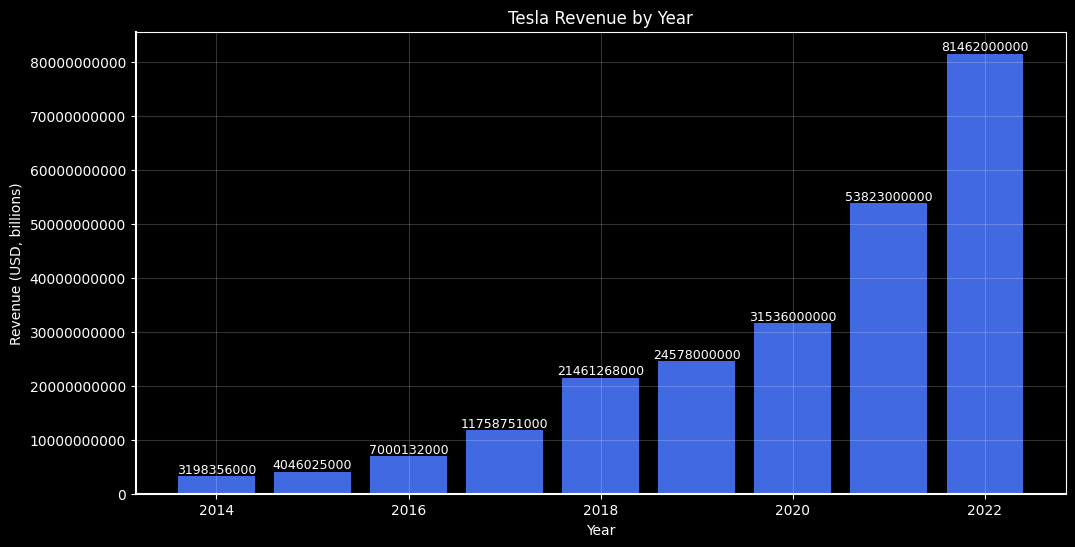

In [146]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
plt.title("Tesla Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (USD, billions)")
for i in range(len(year)):
    plt.text(year.iloc[i], revenue.iloc[i], str(revenue.iloc[i][0]), ha='center', va='bottom', fontsize=9)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
ax.grid(color='white', alpha=0.20)
plt.show()

Revenue generated by Tesla is in billions of dollars from 2014 to 2022. Over the past 10 years, Tesla's revenue has been increasing significantly, from 3.2 billion dollars in 2014 to 81.5 billion dollars in 2022. This indicates that the company has been growing rapidly and expanding its market share. It also suggests that Tesla's products have been well-received by consumers, resulting in increased sales and revenue.

#### TESLA COST OF REVENUE

In [148]:
data2 = tesla_income_statement.loc[7].iloc[1:]
data2 = data2.head(10)
data2

2022    60609000000
2021    40217000000
2020    24906000000
2019    20509000000
2018    17419247000
2017     9536264000
2016     5400875000
2015     3122522000
2014     2316685000
2013     1557234000
Name: 7, dtype: object

In [149]:
years = [int(year) for year in data2.index]
costs = [int(cost) for cost in data2.values]

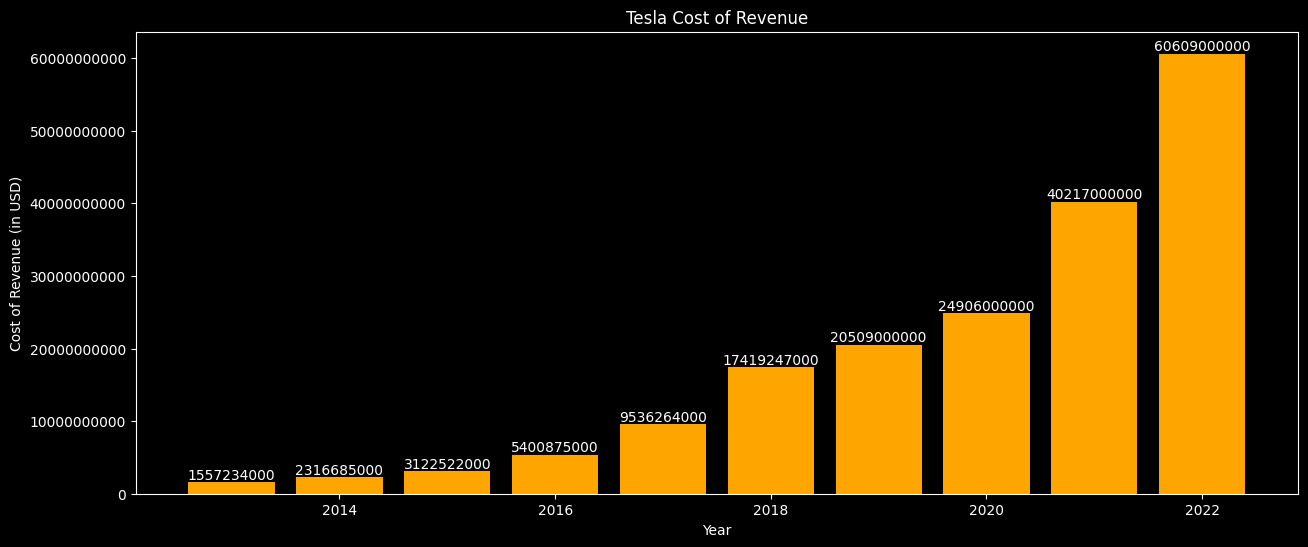

In [150]:
plt.figure(figsize=(15, 6))
plt.bar(years, costs, color='orange')
plt.title('Tesla Cost of Revenue')
plt.xlabel('Year')
plt.ylabel('Cost of Revenue (in USD)')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
for i in range(len(costs)):
    plt.text(x=years[i], y=costs[i], s=costs[i], ha='center', va='bottom')
plt.show()

The analogy for the cost of revenue for Tesla for the last 10 years shows that it has been consistently increasing, which may indicate that the company is investing more in production and operations to keep up with its revenue growth. 

#### COMPARISION BETWEEN TESLA REVENUE AND TESLA COST OF REVENUE

In [151]:
data = tesla_income_statement.loc[6].head(10)
data2 = tesla_income_statement.loc[7].head(10)

In [152]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  
        year.append(int(k))
        revenue.append(int(v))

In [153]:
years = []
costs = []
for k, v in data2.items():
    if k != 'breakdown': 
        years.append(int(k))
        costs.append(int(v))

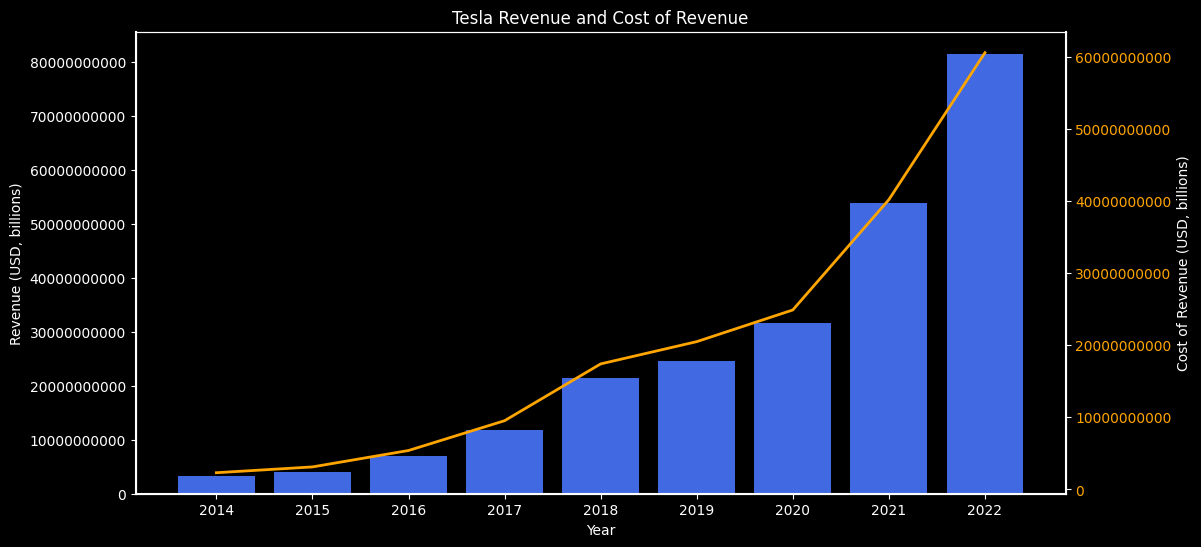

In [154]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(year, revenue, color="royalblue")
ax1.set_xlabel("Year")
ax1.set_ylabel("Revenue (USD, billions)")
ax1.tick_params(axis='y')
ax1.ticklabel_format(axis='y', style='plain')
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax2 = ax1.twinx()
ax2.plot(years, costs, color='orange', linewidth=2)
ax2.set_ylabel('Cost of Revenue (USD, billions)')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.ticklabel_format(axis='y', style='plain')
ax2.spines['right'].set_linewidth(1.5)

plt.title('Tesla Revenue and Cost of Revenue')
ax1.set_xticks(year)
ax1.set_xticklabels(year)
plt.show()

#### FINANCIAL METRICS

In [160]:
#Get historical financial ratios and metrics
financial_metrics = fa.key_metrics(ticker, api_key, period="annual")
financial_metrics

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenuePerShare,27.539554,18.19574,10.95,9.25725,8.390272,4.729284,3.236038,2.103984,1.711637,1.124032,0.256643,0.135634,0.153454,0.096055,0.007209,0.000036
netIncomePerShare,4.253888,1.865788,0.239583,-0.32467,-0.381602,-0.788861,-0.312001,-0.462116,-0.157359,-0.041318,-0.246059,-0.16895,-0.202856,-0.047829,-0.040481,-0.03822
operatingCashFlowPerShare,4.977688,3.886748,2.063542,0.905838,0.820135,-0.024395,-0.057244,-0.272746,-0.030685,0.144025,-0.165244,-0.075947,-0.168009,-0.069353,-0.02563,-0.026147
freeCashFlowPerShare,2.553076,1.177485,0.937847,0.364595,-0.086679,-1.665886,-0.723148,-1.122889,-0.54973,-0.003478,-0.313811,-0.207367,-0.220854,-0.079551,-0.030339,-0.03094
cashPerShare,7.5,5.986139,6.730556,2.360829,1.440891,1.354551,1.568624,0.622407,1.019864,0.472217,0.125379,0.186161,0.130864,0.059745,0.004537,0.008416
bookValuePerShare,15.112914,10.205882,7.717014,2.492655,1.924739,1.704188,2.197187,0.566265,0.487912,0.372419,0.077442,0.148785,0.272154,-0.21754,-0.097662,-0.057628
tangibleBookValuePerShare,15.316092,10.096687,8.041319,2.852354,2.331214,2.095659,2.55595,0.566265,0.487912,0.364643,0.068582,0.148785,0.272154,-0.21754,-0.097662,-0.057628
shareholdersEquityPerShare,15.112914,10.205882,7.717014,2.492655,1.924739,1.704188,2.197187,0.566265,0.487912,0.372419,0.077442,0.148785,0.272154,-0.21754,-0.097662,-0.057628
interestDebtPerShare,2.007776,3.125085,4.870486,5.793597,5.664992,5.062483,4.062041,1.473943,1.396769,0.357174,0.28997,0.186071,0.096737,0.003107,0.029098,0.000903


In [161]:
financial_metrics.to_csv('Desktop/Tesla_financial_metrics.csv', index=True)

In [162]:
tesla_finance = pd.read_csv('Desktop/Tesla_financial_metrics.csv')

In [165]:
tesla_finance.head()

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
1,revenuePerShare,27.539553752535497,18.19574036511156,10.95,9.257250470809792,8.390272394077115,4.729284458869758,3.236037685259664,2.103984337217828,1.7116368180370813,1.1240323449532885,0.2566432849863529,0.13563396812018683,0.15345413837658314,0.09605478789437664,0.007208978214626275,3.5697694320154526e-05
2,netIncomePerShare,4.253887762001352,1.8657876943881,0.23958333333333334,-0.32467043314500943,-0.38160230660216,-0.7888608694602975,-0.31200085059958027,-0.4621160356312694,-0.15735887123748057,-0.041318249442448704,-0.24605911559492868,-0.16895042872389054,-0.20285642317704827,-0.04782875103608582,-0.04048118535905523,-0.038219516369593386
3,operatingCashFlowPerShare,4.9776876267748476,3.8867478025693036,2.0635416666666666,0.9058380414312618,0.8201346821091726,-0.02439459935568721,-0.05724396490352167,-0.2727461350056941,-0.03068455176215285,0.14402492024015875,-0.16524358245846102,-0.07594737189264229,-0.16800904204823996,-0.06935340513978536,-0.02562996650284848,-0.02614684955622387
4,freeCashFlowPerShare,2.553076402974983,1.1774847870182557,0.9378472222222223,0.36459510357815444,-0.08667898157650393,-1.6658856083366513,-0.7231483279246295,-1.122888878488635,-0.5497296096800002,-0.0034778919397202616,-0.3138107170692477,-0.207367059102484,-0.22085387112000188,-0.07955069393262432,-0.030339128096041466,-0.030940120785349277


In [166]:
tesla_finance.columns.values[0] = "breakdown"

In [167]:
tesla_finance

,breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
1,revenuePerShare,27.539553752535497,18.19574036511156,10.95,9.257250470809792,8.390272394077115,4.729284458869758,3.236037685259664,2.103984337217828,1.7116368180370813,1.1240323449532885,0.2566432849863529,0.13563396812018683,0.15345413837658314,0.09605478789437664,0.007208978214626275,3.5697694320154526e-05
2,netIncomePerShare,4.253887762001352,1.8657876943881,0.23958333333333334,-0.32467043314500943,-0.38160230660216,-0.7888608694602975,-0.31200085059958027,-0.4621160356312694,-0.15735887123748057,-0.041318249442448704,-0.24605911559492868,-0.16895042872389054,-0.20285642317704827,-0.04782875103608582,-0.04048118535905523,-0.038219516369593386
3,operatingCashFlowPerShare,4.9776876267748476,3.8867478025693036,2.0635416666666666,0.9058380414312618,0.8201346821091726,-0.02439459935568721,-0.05724396490352167,-0.2727461350056941,-0.03068455176215285,0.14402492024015875,-0.16524358245846102,-0.07594737189264229,-0.16800904204823996,-0.06935340513978536,-0.02562996650284848,-0.02614684955622387
4,freeCashFlowPerShare,2.553076402974983,1.1774847870182557,0.9378472222222223,0.36459510357815444,-0.08667898157650393,-1.6658856083366513,-0.7231483279246295,-1.122888878488635,-0.5497296096800002,-0.0034778919397202616,-0.3138107170692477,-0.207367059102484,-0.22085387112000188,-0.07955069393262432,-0.030339128096041466,-0.030940120785349277
5,cashPerShare,7.5,5.986139283299527,6.730555555555555,2.360828625235405,1.4408905830034697,1.3545506099253128,1.5686239702659972,0.6224073467392605,1.019864122509158,0.4722167792934241,0.1253792148351017,0.18616084537571906,0.13086400250544666,0.059744751496044975,0.004536541235727035,0.008416342697865474
6,bookValuePerShare,15.11291413116971,10.205882352941176,7.717013888888889,2.4926553672316385,1.924739481014514,1.7041880331567707,2.1971870117142354,0.5662646968586034,0.48791204086492795,0.37241914459489256,0.07744211248668673,0.1487848355748928,0.27215422156680247,-0.2175401587535268,-0.0976620455267855,-0.05762781486099905
7,tangibleBookValuePerShare,15.316091954022989,10.096686950642326,8.041319444444444,2.8523540489642185,2.331213605043249,2.0956587314036126,2.5559500365203083,0.5662646968586034,0.48791204086492795,0.3646427345274282,0.06858191506208722,0.1487848355748928,0.27215422156680247,-0.2175401587535268,-0.0976620455267855,-0.05762781486099905
8,shareholdersEquityPerShare,15.11291413116971,10.205882352941176,7.717013888888889,2.4926553672316385,1.924739481014514,1.7041880331567707,2.1971870117142354,0.5662646968586034,0.48791204086492795,0.37241914459489256,0.07744211248668673,0.1487848355748928,0.27215422156680247,-0.2175401587535268,-0.0976620455267855,-0.05762781486099905
9,interestDebtPerShare,2.0077755240027044,3.1250845165652468,4.870486111111111,5.793596986817326,5.664992229878317,5.062483459822955,4.06204060688431,1.473943204214183,1.3967686951961233,0.35717447796730334,0.28997009753234776,0.18607052986928874,0.09673693991832245,0.0031070668730116026,0.029098021956527054,0.000903200567251033


### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

In [202]:
game_stop = yf.Ticker('GME')
game_stop_history = game_stop.history(period="max")

In [203]:
game_stop_history.reset_index(inplace=True)

In [204]:
game_stop_dataset = {'Date':game_stop_history.tail(1).Date, 
                 'Open Price':game_stop_history.tail(1).Open,
                 'Close Price':game_stop_history.tail(1).Close}

In [205]:
ticker = "GME"
api_key = "6eb8c70712a889b4f7efbf8d8ad902d4"

In [206]:
df_game_stop = pd.DataFrame(game_stop_dataset)

In [207]:
df_game_stop

,Date,Open Price,Close Price
5310,2023-03-20 00:00:00-04:00,16.65,16.870001


In [208]:
#Get historical financial ratios and metrics
financial_metrics = fa.key_metrics(ticker, api_key, period="annual")
financial_metrics

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1998
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenuePerShare,20.698003,19.576154,18.474286,20.287218,22.743097,20.812137,22.084434,20.713012,19.28221,17.576543,...,11.208591,8.869327,6.672529,4.214093,3.503546,3.004119,3.891867,2.626763,1.920145,1.330775
netIncomePerShare,-1.313017,-0.828077,-1.345429,-1.647894,0.085552,0.853965,0.95,0.875891,0.755546,-0.533426,...,0.455505,0.263884,0.217507,0.139324,0.140837,0.116373,0.024161,-0.041521,-0.012018,0.008796
operatingCashFlowPerShare,-1.495523,0.475769,-1.184286,0.796033,1.072239,1.298598,1.549057,1.070633,1.62692,1.250791,...,0.794315,0.706198,0.628924,0.33384,0.154891,0.206235,0.271179,None,None,None
freeCashFlowPerShare,-1.709022,0.245,-1.408571,0.566601,0.792653,0.953578,1.140566,0.715018,1.359002,0.974684,...,0.516913,0.482868,0.390025,0.109038,0.015074,0.118453,0.200148,None,None,None
cashPerShare,4.378099,1.955769,1.426857,3.977473,2.131164,1.618472,1.062264,1.359403,1.143771,1.257516,...,1.35473,1.08789,0.866698,0.391021,0.454698,0.515265,0.280312,0,0,0
bookValuePerShare,5.518251,1.679615,1.747143,3.271792,5.459813,5.449952,4.908019,4.607175,4.802474,4.521954,...,2.942699,2.294292,2.405717,1.241747,1.318199,1.218433,-0.013833,-0.071545,-0.0851,0.030163
tangibleBookValuePerShare,5.476584,1.608462,1.682,2.298727,0.931213,0.052466,0.645991,0.979278,1.370307,1.482991,...,0.726818,-0.046739,-0.599186,0.507947,0.606264,0.512351,-1.117575,-0.071545,-0.0851,0.030163
shareholdersEquityPerShare,5.518251,1.679615,1.747143,3.271792,5.459813,5.449952,4.908019,4.607175,4.802474,4.521954,...,2.942699,2.294292,2.405717,1.241747,1.318199,1.218433,-0.013833,-0.071545,-0.0851,0.030163
interestDebtPerShare,2.327479,4.156923,3.505714,2.148874,2.156558,2.10058,0.881604,0.816399,0.020478,0.008307,...,0.907678,1.568396,2.106332,0.083513,0,0,0,0,0,0


In [209]:
financial_metrics.to_csv('Desktop/game_Stop_financial_metrics.csv', index=True)

In [210]:
game_stop_financial = pd.read_csv('Desktop/game_Stop_financial_metrics.csv')
game_stop_financial

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1998
0,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
1,revenuePerShare,20.698002754820937,19.576153846153847,18.474285714285713,20.287218413320275,22.7430966469428,20.812137330754354,22.08443396226415,20.71301247771836,19.282209897610922,...,11.208590876341436,8.86932712574371,6.6725289191988955,4.214092971351213,3.5035460678146637,3.004119366128373,3.8918673109500403,2.626763448026882,1.9201449637590602,1.3307749451526008
2,netIncomePerShare,-1.31301652892562,-0.828076923076923,-1.3454285714285714,-1.6478942213516161,0.08555226824457594,0.8539651837524178,0.95,0.8758912655971479,0.7555460750853242,...,0.4555051002995715,0.2638837010752114,0.21750690607734807,0.1393243935457905,0.14083747559027163,0.11637264829718062,0.024160626510039158,-0.041520869782554364,-0.012017828876114306,0.008796412008109085
3,operatingCashFlowPerShare,-1.4955234159779613,0.4757692307692308,-1.1842857142857144,0.7960333006856023,1.0722386587771202,1.2985976789168279,1.549056603773585,1.070632798573975,1.626919795221843,...,0.7943147775966023,0.7061978068888237,0.6289235151933702,0.3338402363616406,0.15489082194212675,0.20623478832453943,0.27117873309450413,NaN,NaN,NaN
4,freeCashFlowPerShare,-1.709022038567493,0.245,-1.4085714285714286,0.5666013712047012,0.7926528599605522,0.9535783365570599,1.140566037735849,0.7150178253119429,1.3590017064846416,...,0.5169125175382049,0.4828679864464662,0.3900250345303867,0.1090382715597673,0.015074116811645659,0.11845342784558262,0.20014787969674247,NaN,NaN,NaN
5,cashPerShare,4.378099173553719,1.9557692307692307,1.4268571428571428,3.9774730656219393,2.131163708086785,1.6184719535783365,1.0622641509433963,1.3594028520499108,1.1437713310580204,...,1.3547299432457371,1.0878895306955525,0.8666976001381216,0.3910211847352823,0.4546977631812533,0.5152649718417452,0.28031186647782497,0,0,0
6,bookValuePerShare,5.518250688705234,1.6796153846153845,1.747142857142857,3.27179236043095,5.4598126232741615,5.44995164410058,4.908018867924528,4.607174688057041,4.802474402730375,...,2.9426990507249124,2.2942924415036954,2.405716937154696,1.241747008891003,1.3181985620450913,1.2184329975661319,-0.013833347218750867,-0.07154461384653836,-0.08510025271459913,0.030162598239329055
7,tangibleBookValuePerShare,5.476584022038567,1.6084615384615384,1.682,2.2987267384916747,0.9312130177514792,0.05246615087040619,0.6459905660377359,0.9792780748663101,1.370307167235495,...,0.7268179692338806,-0.04673868093167205,-0.5991863777624309,0.5079465625114339,0.6062644239304101,0.5123514363374727,-1.1175747729734233,-0.07154461384653836,-0.08510025271459913,0.030162598239329055
8,shareholdersEquityPerShare,5.518250688705234,1.6796153846153845,1.747142857142857,3.27179236043095,5.4598126232741615,5.44995164410058,4.908018867924528,4.607174688057041,4.802474402730375,...,2.9426990507249124,2.2942924415036954,2.405716937154696,1.241747008891003,1.3181985620450913,1.2184329975661319,-0.013833347218750867,-0.07154461384653836,-0.08510025271459913,0.030162598239329055
9,interestDebtPerShare,2.3274793388429753,4.156923076923077,3.505714285714286,2.148873653281097,2.1565581854043394,2.1005802707930368,0.8816037735849057,0.8163992869875223,0.020477815699658702,...,0.9076779416783588,1.56839632080254,2.1063320096685083,0.08351322673886795,0,0,0,0,0,0


In [211]:
game_stop_financial.columns.values[0] = "breakdown"

In [212]:
game_stop_financial

,breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1998
0,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
1,revenuePerShare,20.698002754820937,19.576153846153847,18.474285714285713,20.287218413320275,22.7430966469428,20.812137330754354,22.08443396226415,20.71301247771836,19.282209897610922,...,11.208590876341436,8.86932712574371,6.6725289191988955,4.214092971351213,3.5035460678146637,3.004119366128373,3.8918673109500403,2.626763448026882,1.9201449637590602,1.3307749451526008
2,netIncomePerShare,-1.31301652892562,-0.828076923076923,-1.3454285714285714,-1.6478942213516161,0.08555226824457594,0.8539651837524178,0.95,0.8758912655971479,0.7555460750853242,...,0.4555051002995715,0.2638837010752114,0.21750690607734807,0.1393243935457905,0.14083747559027163,0.11637264829718062,0.024160626510039158,-0.041520869782554364,-0.012017828876114306,0.008796412008109085
3,operatingCashFlowPerShare,-1.4955234159779613,0.4757692307692308,-1.1842857142857144,0.7960333006856023,1.0722386587771202,1.2985976789168279,1.549056603773585,1.070632798573975,1.626919795221843,...,0.7943147775966023,0.7061978068888237,0.6289235151933702,0.3338402363616406,0.15489082194212675,0.20623478832453943,0.27117873309450413,NaN,NaN,NaN
4,freeCashFlowPerShare,-1.709022038567493,0.245,-1.4085714285714286,0.5666013712047012,0.7926528599605522,0.9535783365570599,1.140566037735849,0.7150178253119429,1.3590017064846416,...,0.5169125175382049,0.4828679864464662,0.3900250345303867,0.1090382715597673,0.015074116811645659,0.11845342784558262,0.20014787969674247,NaN,NaN,NaN
5,cashPerShare,4.378099173553719,1.9557692307692307,1.4268571428571428,3.9774730656219393,2.131163708086785,1.6184719535783365,1.0622641509433963,1.3594028520499108,1.1437713310580204,...,1.3547299432457371,1.0878895306955525,0.8666976001381216,0.3910211847352823,0.4546977631812533,0.5152649718417452,0.28031186647782497,0,0,0
6,bookValuePerShare,5.518250688705234,1.6796153846153845,1.747142857142857,3.27179236043095,5.4598126232741615,5.44995164410058,4.908018867924528,4.607174688057041,4.802474402730375,...,2.9426990507249124,2.2942924415036954,2.405716937154696,1.241747008891003,1.3181985620450913,1.2184329975661319,-0.013833347218750867,-0.07154461384653836,-0.08510025271459913,0.030162598239329055
7,tangibleBookValuePerShare,5.476584022038567,1.6084615384615384,1.682,2.2987267384916747,0.9312130177514792,0.05246615087040619,0.6459905660377359,0.9792780748663101,1.370307167235495,...,0.7268179692338806,-0.04673868093167205,-0.5991863777624309,0.5079465625114339,0.6062644239304101,0.5123514363374727,-1.1175747729734233,-0.07154461384653836,-0.08510025271459913,0.030162598239329055
8,shareholdersEquityPerShare,5.518250688705234,1.6796153846153845,1.747142857142857,3.27179236043095,5.4598126232741615,5.44995164410058,4.908018867924528,4.607174688057041,4.802474402730375,...,2.9426990507249124,2.2942924415036954,2.405716937154696,1.241747008891003,1.3181985620450913,1.2184329975661319,-0.013833347218750867,-0.07154461384653836,-0.08510025271459913,0.030162598239329055
9,interestDebtPerShare,2.3274793388429753,4.156923076923077,3.505714285714286,2.148873653281097,2.1565581854043394,2.1005802707930368,0.8816037735849057,0.8163992869875223,0.020477815699658702,...,0.9076779416783588,1.56839632080254,2.1063320096685083,0.08351322673886795,0,0,0,0,0,0


In [213]:
income_statement_annually = fa.income_statement(ticker, api_key, period="annual")

In [214]:
income_statement_annually.to_csv('Desktop/game_stop_income_statement.csv', index=True)

In [215]:
game_stop_income_statement = pd.read_csv('Desktop/game_stop_income_statement.csv')

In [216]:
game_stop_income_statement.columns.values[0] = "breakdown"

In [217]:
game_stop_income_statement

,breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1998
0,reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
1,cik,0001326380,0001326380,0001326380,0001326380,0001326380,0001326380,0001326380,0001326380,0001326380,...,0001326380,0001326380,0001326380,0001326380,0001326380,0001326380,0001326380,0001326380,0001326380,0001326380
2,fillingDate,2022-03-17,2021-03-23,2020-03-27,2019-04-02,2018-04-02,2017-03-27,2016-03-28,2015-03-30,2014-04-02,...,2008-04-02,2007-04-04,2006-04-03,2005-01-31,2004-01-31,2003-01-31,2002-01-31,2001-01-31,2000-01-31,1998-01-31
3,acceptedDate,2022-03-17 16:10:28,2021-03-23 16:39:12,2020-03-27 14:20:10,2019-04-02 16:18:29,2018-04-02 16:24:11,2017-03-27 16:12:21,2016-03-28 16:56:06,2015-03-30 16:45:04,2014-04-02 12:23:47,...,2008-04-02 16:17:23,2007-04-04 16:26:58,2006-04-03 16:49:57,2005-01-30 19:00:00,2004-01-30 19:00:00,2003-01-30 19:00:00,2002-01-30 19:00:00,2001-01-30 19:00:00,2000-01-30 19:00:00,1998-01-30 19:00:00
4,calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1998
5,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
6,revenue,6010700000,5089800000,6466000000,8285300000,9224600000,8607900000,9363800000,9296000000,9039500000,...,7093962000,5318900000,3091783000,1842806000,1578838000,1352791000,1121138000,756697000,553140000,383359000
7,costOfRevenue,4662900000,3830300000,4557300000,5977200000,6184500000,5598600000,6445500000,6520100000,6378400000,...,5280255000,3847458000,2219753000,1328611000,1142264000,1009491000,854035000,570995000,421673000,291767000
8,grossProfit,1347800000,1259500000,1908700000,2308100000,3040100000,3009300000,2918300000,2775900000,2661100000,...,1813707000,1471442000,872030000,514195000,436574000,343300000,267103000,185702000,131467000,91592000
9,grossProfitRatio,0.22423345034688139,0.24745569570513576,0.29519022579647386,0.2785777219895478,0.3295644255577478,0.34959746279580384,0.31165766035156667,0.29861230636833047,0.29438575142430445,...,0.2556691169194309,0.27664404294120964,0.28204760812773727,0.2790282862113538,0.27651602000965264,0.253771646913677,0.23824274977745827,0.24541130730001573,0.2376740065806125,0.23891965494484282


#### Game Stop Revnue

In [218]:
data = game_stop_income_statement.loc[6]
data = data.head(10)
data

breakdown       revenue
2022         6010700000
2021         5089800000
2020         6466000000
2019         8285300000
2018         9224600000
2017         8607900000
2016         9363800000
2015         9296000000
2014         9039500000
Name: 6, dtype: object

In [219]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

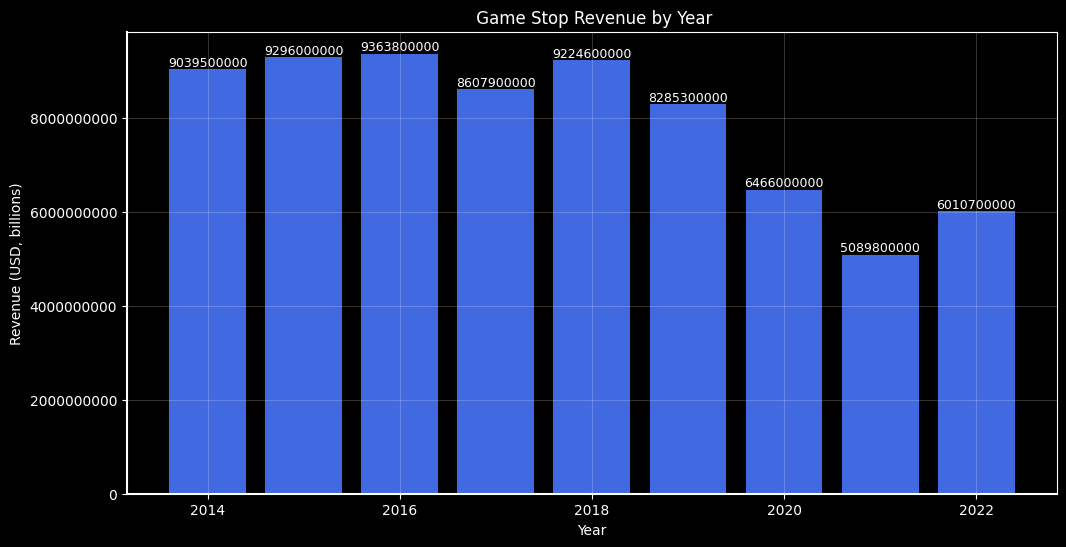

In [222]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
plt.title(" Game Stop Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (USD, billions)")
for i in range(len(year)):
    plt.text(year.iloc[i], revenue.iloc[i], str(revenue.iloc[i][0]), ha='center', va='bottom', fontsize=9)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
ax.grid(color='white', alpha=0.20)
plt.show()

### GAME STOP COST OF REVENUE

In [223]:
data2 = game_stop_income_statement.loc[7].iloc[1:]
data2 = data2.head(10)
data2

2022    4662900000
2021    3830300000
2020    4557300000
2019    5977200000
2018    6184500000
2017    5598600000
2016    6445500000
2015    6520100000
2014    6378400000
2013    6235200000
Name: 7, dtype: object

In [224]:
years = [int(year) for year in data2.index]
costs = [int(cost) for cost in data2.values]

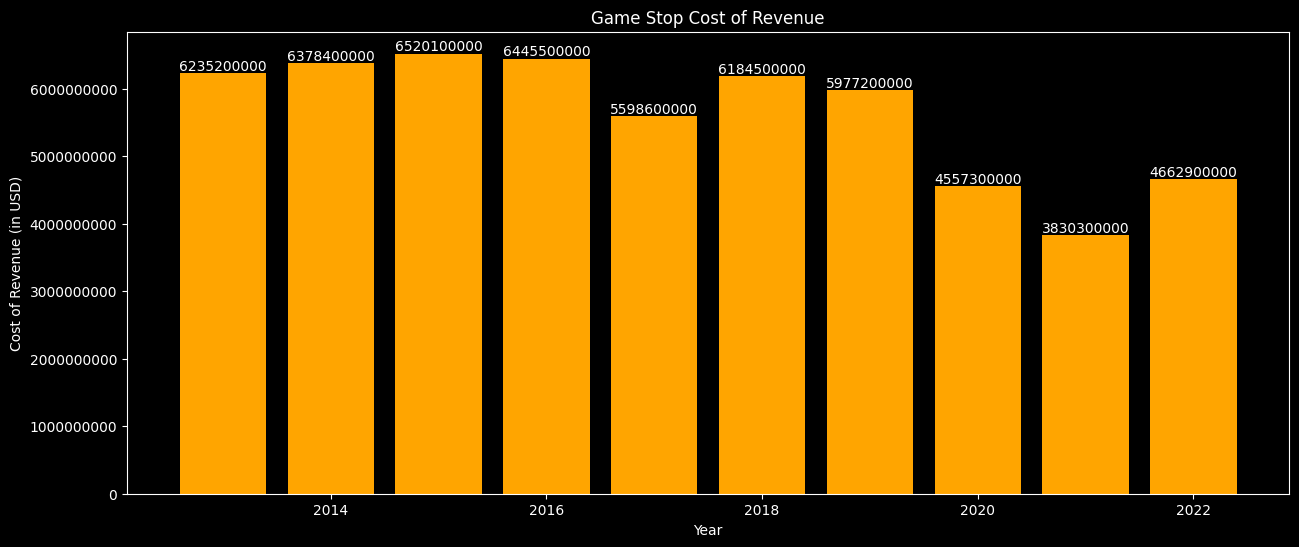

In [225]:
plt.figure(figsize=(15, 6))
plt.bar(years, costs, color='orange')
plt.title('Game Stop Cost of Revenue')
plt.xlabel('Year')
plt.ylabel('Cost of Revenue (in USD)')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(axis='y', style='plain')
for i in range(len(costs)):
    plt.text(x=years[i], y=costs[i], s=costs[i], ha='center', va='bottom')
plt.show()

### COMPARISION BETWEEN REVENUE AND COST OF REVENUE

In [226]:
data = game_stop_income_statement.loc[6].head(10)
data2 = game_stop_income_statement.loc[7].head(10)

In [227]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  
        year.append(int(k))
        revenue.append(int(v))

In [228]:
years = []
costs = []
for k, v in data2.items():
    if k != 'breakdown': 
        years.append(int(k))
        costs.append(int(v))

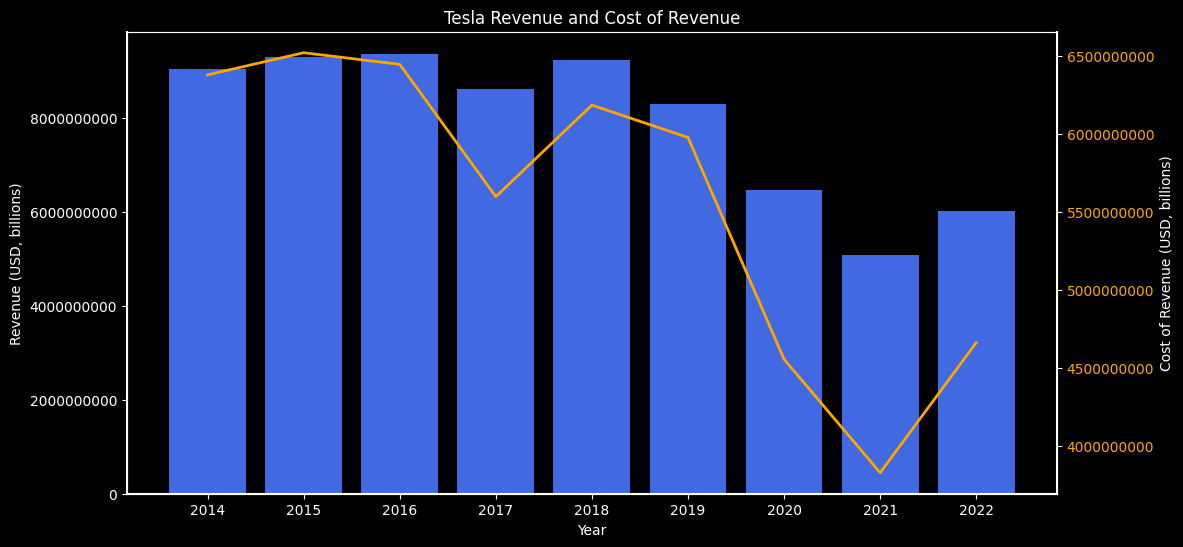

In [229]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(year, revenue, color="royalblue")
ax1.set_xlabel("Year")
ax1.set_ylabel("Revenue (USD, billions)")
ax1.tick_params(axis='y')
ax1.ticklabel_format(axis='y', style='plain')
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax2 = ax1.twinx()
ax2.plot(years, costs, color='orange', linewidth=2)
ax2.set_ylabel('Cost of Revenue (USD, billions)')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.ticklabel_format(axis='y', style='plain')
ax2.spines['right'].set_linewidth(1.5)

plt.title('Tesla Revenue and Cost of Revenue')
ax1.set_xticks(year)
ax1.set_xticklabels(year)
plt.show()